In [25]:
# Modules
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [11]:
# Data
iris = load_iris()
df = pd.DataFrame(
    iris.data, 
    columns=iris.feature_names
    )

df['target'] = iris.target

# Map targets to target names
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
df['target_names'] = df['target'].map(target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


                   petal length (cm)  petal width (cm)
petal length (cm)           1.000000          0.962865
petal width (cm)            0.962865          1.000000
                   petal length (cm)  petal width (cm)
petal length (cm)           1.000000          0.806891
petal width (cm)            0.806891          1.000000


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

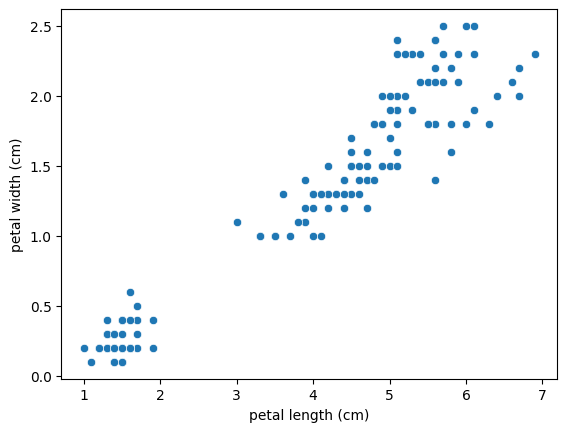

In [16]:
# Two numeric variables correlation
print(df[['petal length (cm)','petal width (cm)']].corr()) # Pearson's correlation
print(df[['petal length (cm)','petal width (cm)']].corr(method='kendall')) # Kendall's correlation
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)")

In [ ]:
# Afficher la matrice de corrélation
corr_matrix = iris_df.corr()

# Affichage sous forme de carte de chaleur (heatmap)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation - Dataset Iris")
plt.show()

In [ ]:
# Two categorical variables : test du chi 2
bins = [0, 2, 4, 7]  # Les intervalles pour classer les valeurs
labels = ['court', 'moyen', 'long']
df['Longueur_pétale_cat'] = pd.cut(df['petal length (cm)'], bins=bins, labels=labels, right=False)

table = pd.crosstab(df.target_names, df['Longueur_pétale_cat'])
print(table)

chi2_stat, p_value, dof, expected = chi2_contingency(table)

print(f"Statistique du chi2 : {chi2_stat}")
print(f"Degrés de liberté : {dof}")
print(f"Valeur p : {p_value}")
print(f"Tableau attendu : \n{expected}")

# Interprétation de la valeur p
if p_value < 0.05:
    print("Il y a une corrélation significative entre la longueur du pétale (catégorielle) et l'espèce.")
else:
    print("Il n'y a pas de corrélation significative entre la longueur du pétale (catégorielle) et l'espèce.")

Longueur_pétale_cat  court  moyen  long
target_names                           
setosa                  50      0     0
versicolor               0     11    39
virginica                0      0    50
Statistique du chi2 : 168.53932584269663
Degrés de liberté : 4
Valeur p : 2.1525088592676216e-35
Tableau attendu : 
[[16.66666667  3.66666667 29.66666667]
 [16.66666667  3.66666667 29.66666667]
 [16.66666667  3.66666667 29.66666667]]
Il y a une corrélation significative entre la longueur du pétale (catégorielle) et l'espèce.


<Axes: xlabel='Longueur_pétale_cat'>

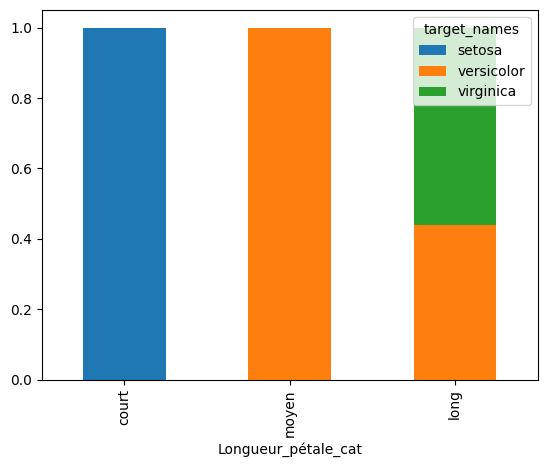

In [35]:
(pd.crosstab(df['Longueur_pétale_cat'],df['target_names'], normalize='index')
   .plot.bar(stacked=True)
)

In [32]:
# Correlation betwwen a categorical variable and a numeric variable : anova table 

f_stat, p_value = stats.f_oneway(
    df[df['target_names'] == 'setosa']['petal length (cm)'],  # Setosa
    df[df['target_names'] == 'versicolor']['petal length (cm)'],  # Versicolor
    df[df['target_names'] == 'virginica']['petal length (cm)']   # Virginica
)

print(f"Statistique F : {f_stat}")
print(f"Valeur p : {p_value}")

if p_value < 0.05:
    print("Les moyennes de la longueur du pétale sont significativement différentes entre les espèces.")
else:
    print("Il n'y a pas de différence significative dans les moyennes de la longueur du pétale entre les espèces.")

Statistique F : 1180.161182252981
Valeur p : 2.856776610961539e-91
Les moyennes de la longueur du pétale sont significativement différentes entre les espèces.


<Axes: xlabel='petal length (cm)', ylabel='target_names'>

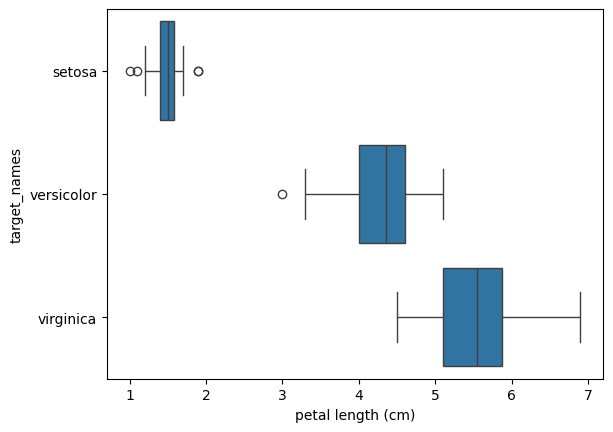

In [33]:
sns.boxplot(data=df, x="petal length (cm)", y="target_names")